# Complete Conceptual Question #1 on page 552 of ISLR Python.

In this chapter, we mentioned the use of correlation-based distance
and Euclidean distance as dissimilarity measures for hierarchical clustering.
It turns out that these two measures are almost equivalent: if
each observation has been centered to have mean zero and standard
deviation one, and if we let rij denote the correlation between the ith
and jth observations, then the quantity 1−rij is proportional to the
squared Euclidean distance between the ith and jth observations.
On the USArrests data, show that this proportionality holds.
Hint: The Euclidean distance can be calculated using the
pairwise_distances() function from the sklearn.metrics module, and pairwise_
correlations can be calculated using the np.corrcoef() function. distances()

In [8]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()
%matplotlib inline
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [22]:
pip install kaggle


     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     ---------------------------------------- 0.0/82.7 kB ? eta -:--:--
     -------------- ------------------------- 30.7/82.7 kB ? eta -:--:--
     ----------------------------- ---------- 61.4/82.7 kB 1.1 MB/s eta 0:00:01
     -------------------------------------- 82.7/82.7 kB 928.9 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.6.17-py3-none-any.whl size=105795 sha256=d3f5df19937a3bd0e0f41a88ae2296a720a241d33a0755390aa27d4937f02911
  Stored in directory: c:\users\ghimi\appdata\local\pip\cache\wheels\46\d2\26\84d0a1acdb9c6baccf7d28cf06962ec80529fe1ad938489983
Successfully built kaggle


In [26]:
kaggle datasets download -d halimedogan/usarrests


SyntaxError: invalid syntax (4186613825.py, line 1)

In [28]:

kaggle datasets download -d halimedogan/usarrests

SyntaxError: invalid syntax (3895456016.py, line 1)

In [134]:
df= pd.read_csv("C:/Users/ghimi/OneDrive/Desktop/PHD in Data Science/4_Predictive Analysis_TIM8555/Assignment_7/USArrests.csv")

In [32]:
crime = pd.read_csv("C:/Users/ghimi/OneDrive/Desktop/PHD in Data Science/4_Predictive Analysis_TIM8555/Assignment_7/USArrests.csv")

In [34]:
#peeking at the dataset

crime.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [36]:
# Let's see how many rows and columns we got!

crime.shape

(50, 5)

In [38]:
#Let's see some facts here

crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [40]:
# Let's get some statistics summary

crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [42]:
# checking the missing data
crime.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [44]:
# Renaming the column as Unnmaed doesn't make sense.

crime = crime.rename(columns={'Unnamed: 0':'State'})

In [46]:
crime.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


<Axes: xlabel='State'>

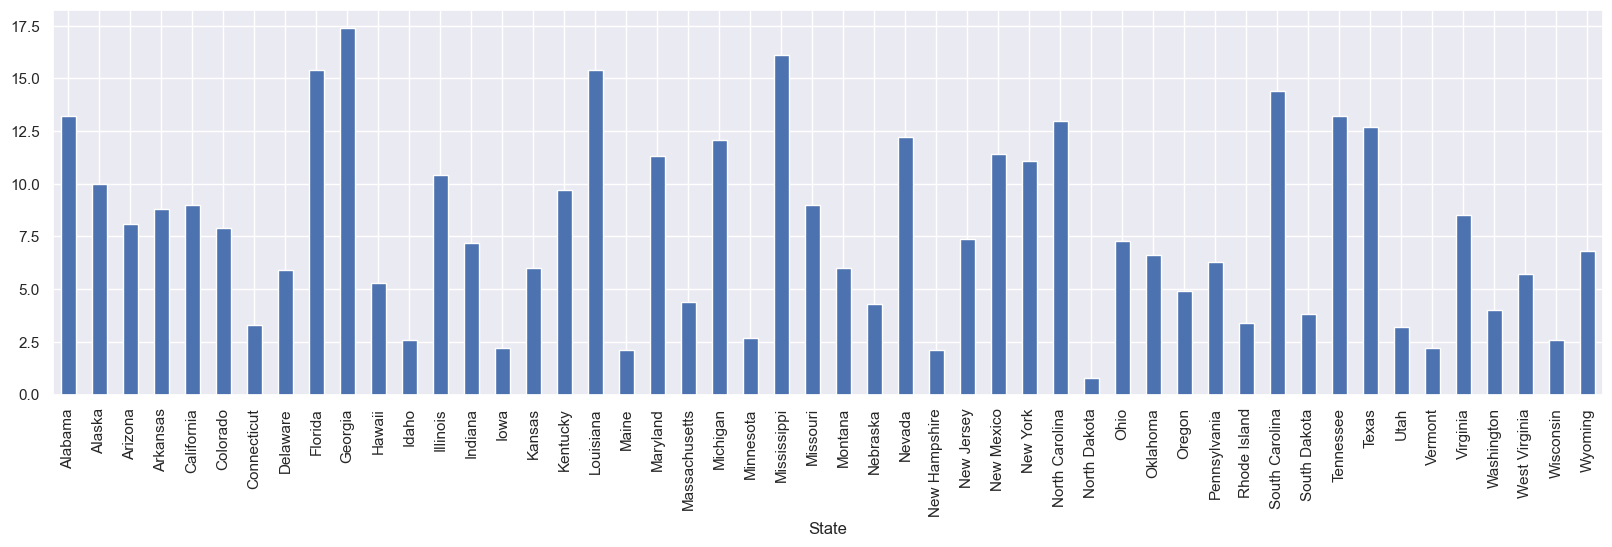

In [48]:
# murder rate 
plt.figure(figsize=(20,5))
crime.groupby('State')['Murder'].max().plot(kind='bar')

Observations:¶
Highest Murder Rate : Georgia and Missisippi
Lowest Murder Rate : Idaho , Iowa, Maine, New Hampshire, North Dakota, Vermont and Wisconsin.

<Axes: xlabel='State'>

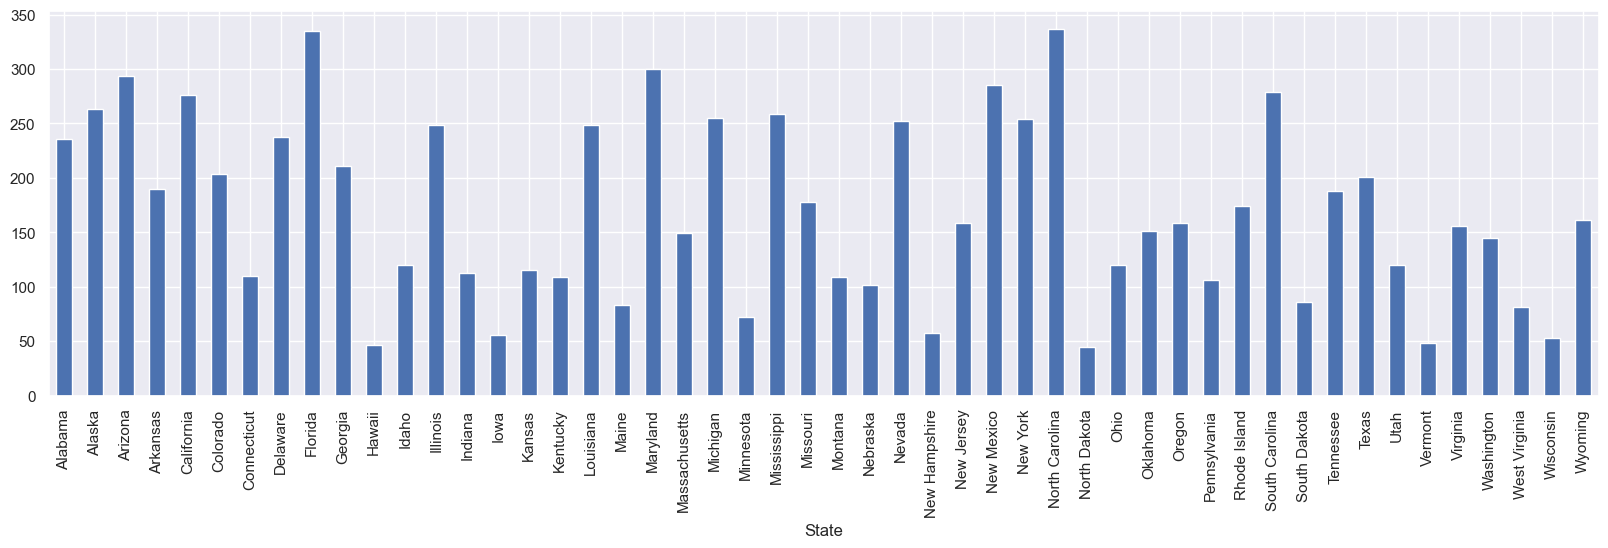

In [51]:
# Assult Rate
plt.figure(figsize=(20,5))
crime.groupby('State')['Assault'].max().plot(kind='bar')

Highest Assualt Rate : Florida and North California.

Lowest Assualt Rate : Hawaii, North Dakota, Vermont , New Hampshire and Wisconsin.

In [ ]:
# Rape_Rate

<Axes: xlabel='State'>

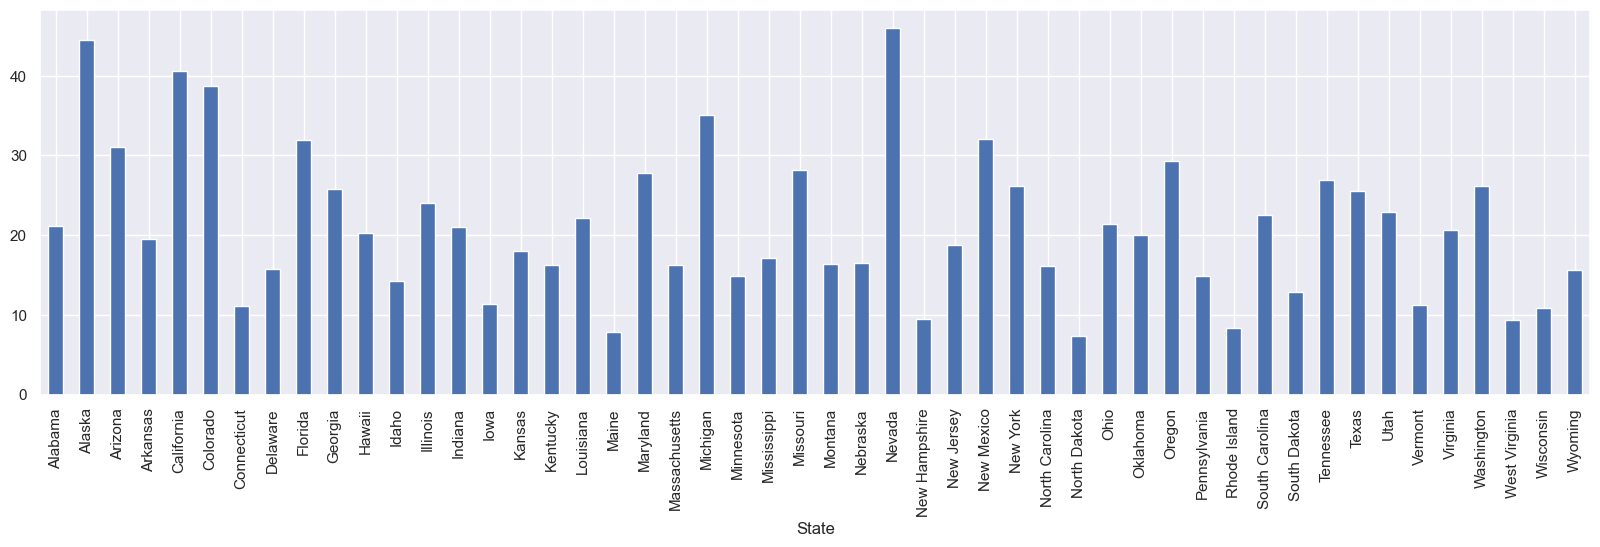

In [55]:
plt.figure(figsize=(20,5))
crime.groupby('State')['Rape'].max().plot(kind='bar')

Highest UrbanPop Rate : Nevada and Alaska.

Lowest UrbanPop Rate : Maine, North Dakota,Vermont,Connecticut,New Hampshire, Wisconsin,Rhode Island and West Virginia

In [ ]:
# UrbanPop: Percent Urban Population

<Axes: xlabel='State'>

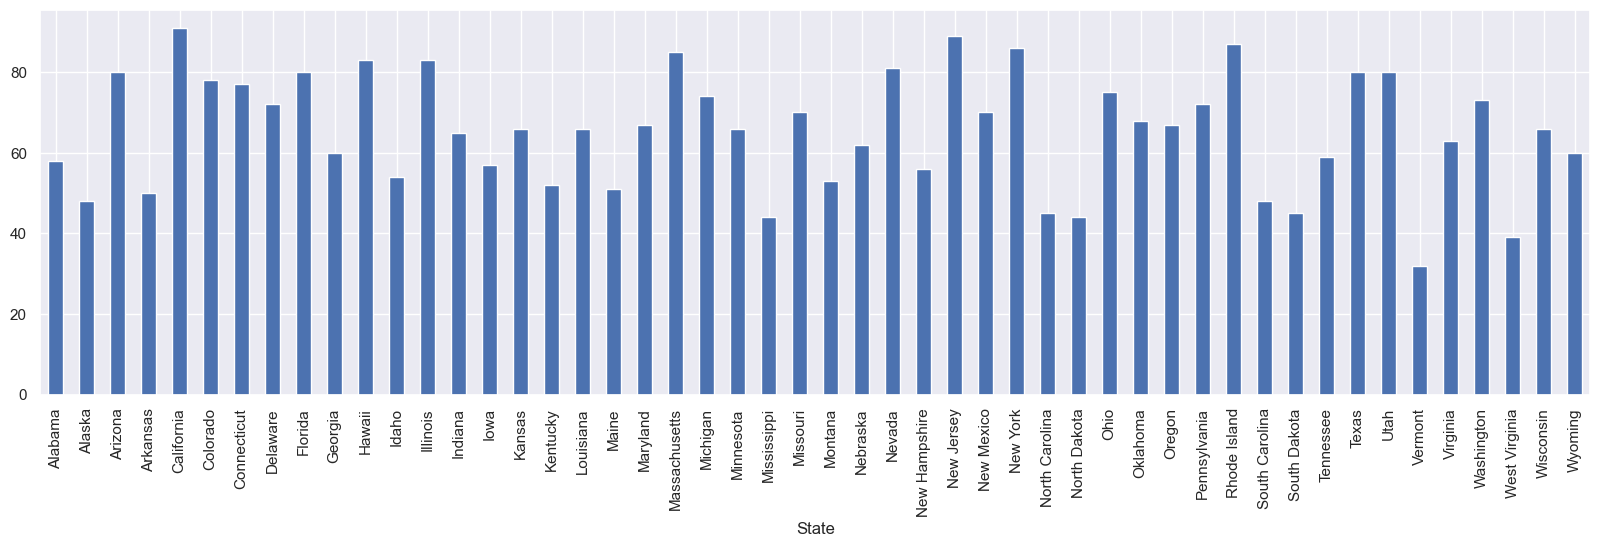

In [59]:
plt.figure(figsize=(20,5))
crime.groupby('State')['UrbanPop'].max().plot(kind='bar')

Text(0, 0.5, 'Murder Rate')

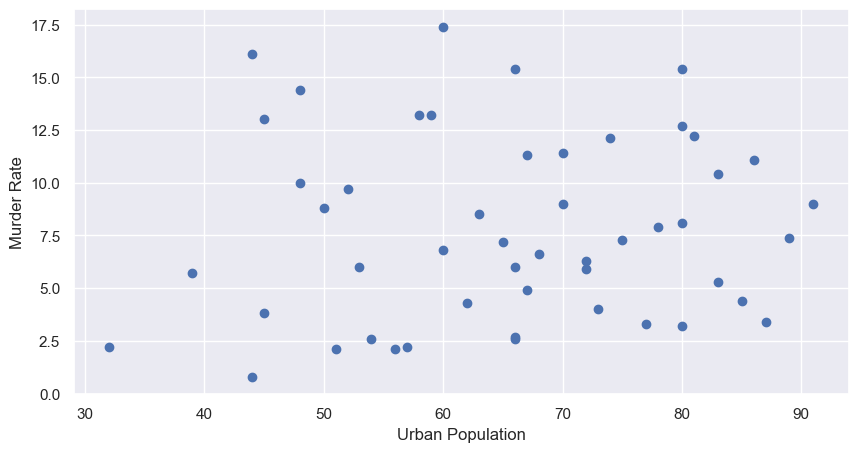

In [61]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Murder',data=crime)
plt.xlabel('Urban Population')
plt.ylabel('Murder Rate')

Text(0, 0.5, 'Rape Rate')

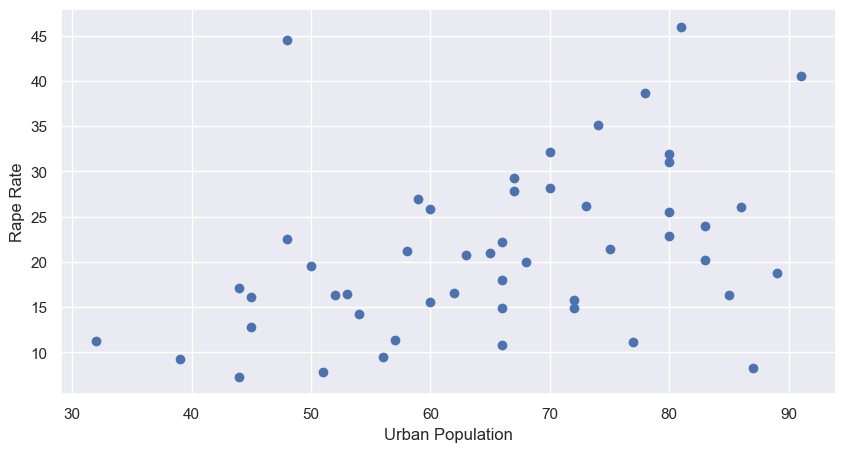

In [63]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Rape',data=crime)
plt.xlabel('Urban Population')
plt.ylabel('Rape Rate')

Text(0, 0.5, 'Assault Rate')

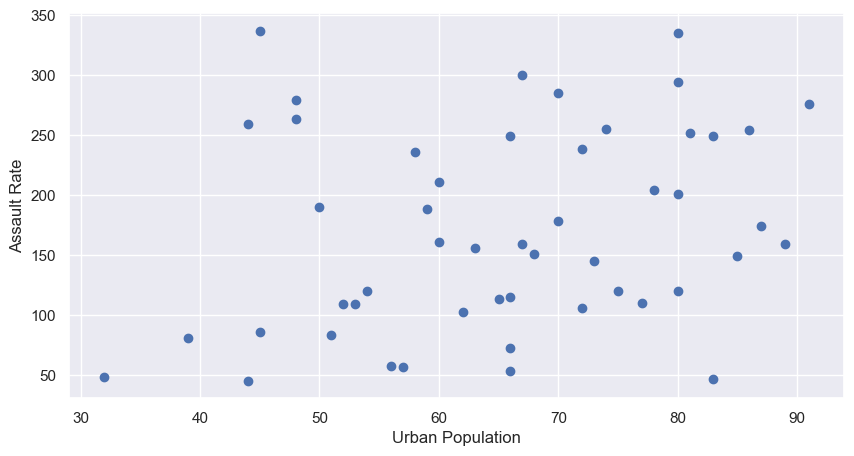

In [65]:
plt.figure(figsize=(10,5))
plt.scatter('UrbanPop','Assault',data=crime)
plt.xlabel('Urban Population')
plt.ylabel('Assault Rate')

In [67]:
data = crime.iloc[:,1:].values

In [69]:
scaled_data = scaler.fit_transform(data)

Single Leakage:¶
The distance between 2 clusters is defined as the shortest distance between points in the two clusters

Text(0, 0.5, 'Euclidean distances')

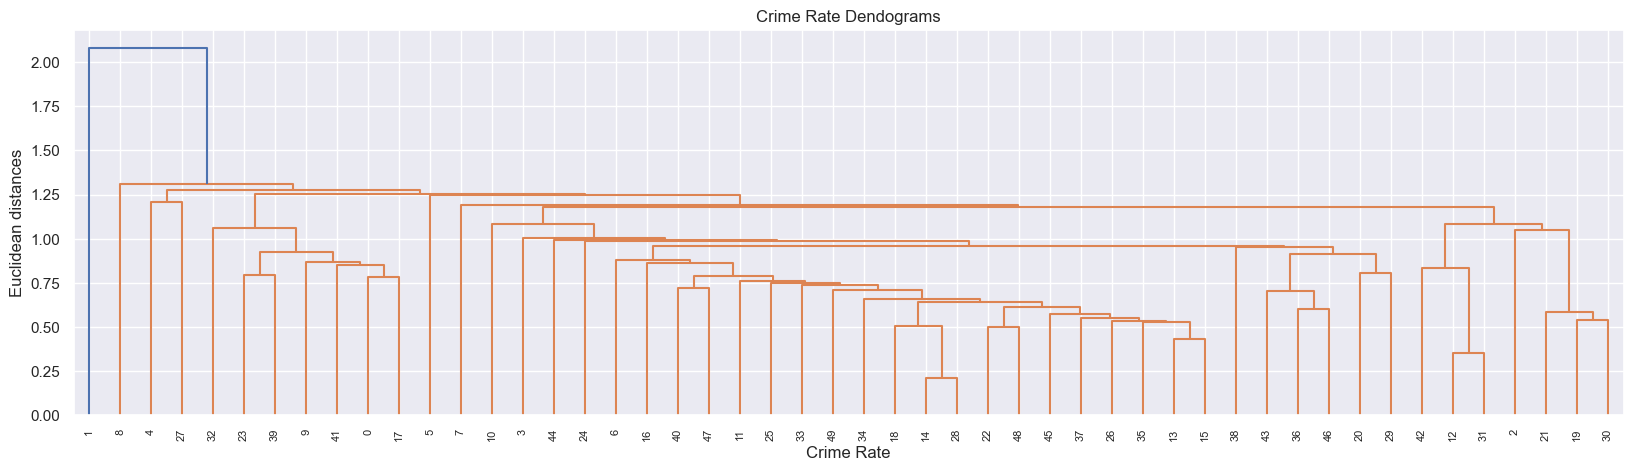

In [72]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='single'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

The hierarchy class has a dendrogram method which takes the value returned by the linkage method of the same class. The linkage method takes the dataset and the method to minimize distances as parameters.

# Complete Linkage

Text(0, 0.5, 'Euclidean distances')

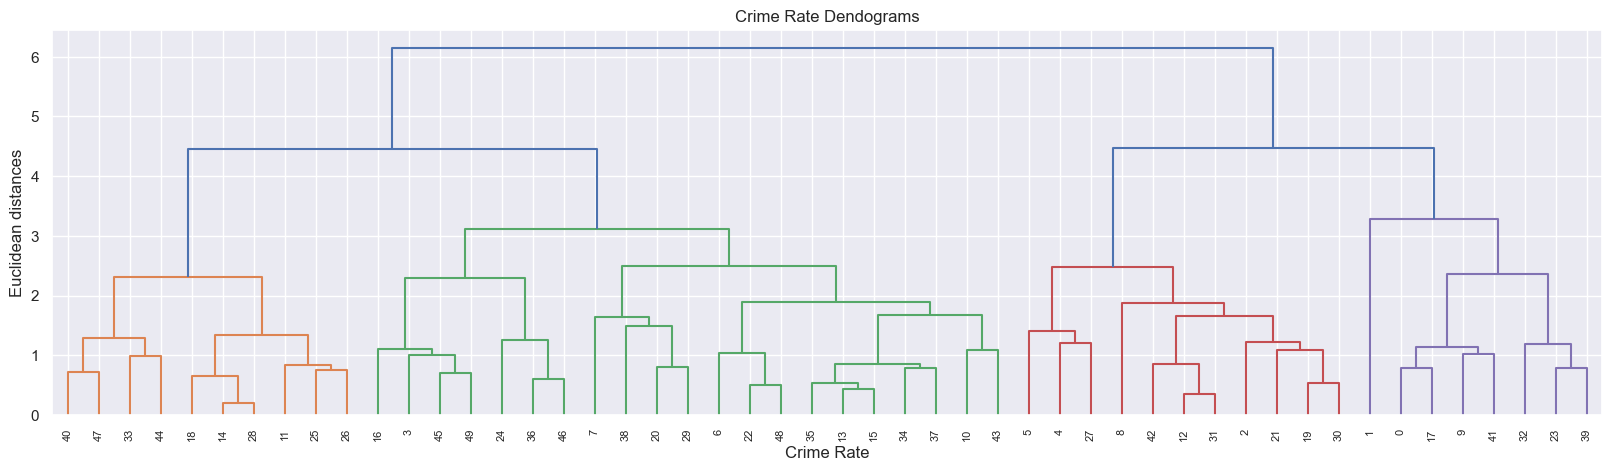

In [78]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='complete'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

# Average Linkage
The distance between 2 clusters is defined as the average distance between every point of one cluster to every other point of the other cluster.

Text(0, 0.5, 'Euclidean distances')

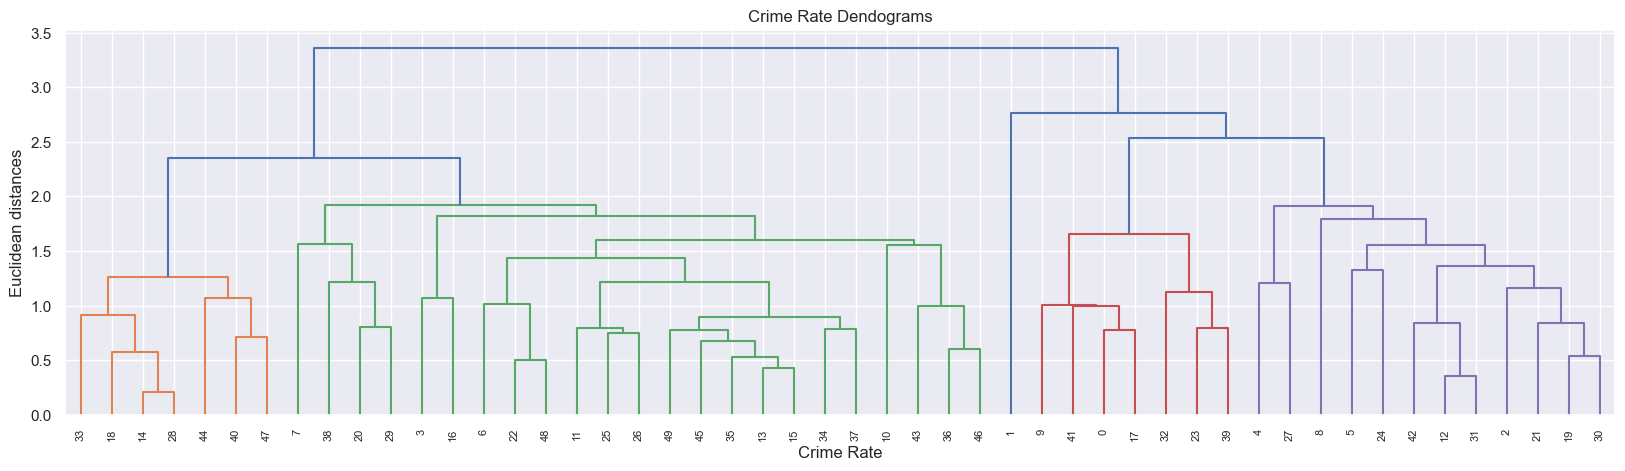

In [81]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='average'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

The single linkage type will produce dendrograms which are not structured properly, whereas complete or average linkage will produce clusters which have a proper tree-like structure.

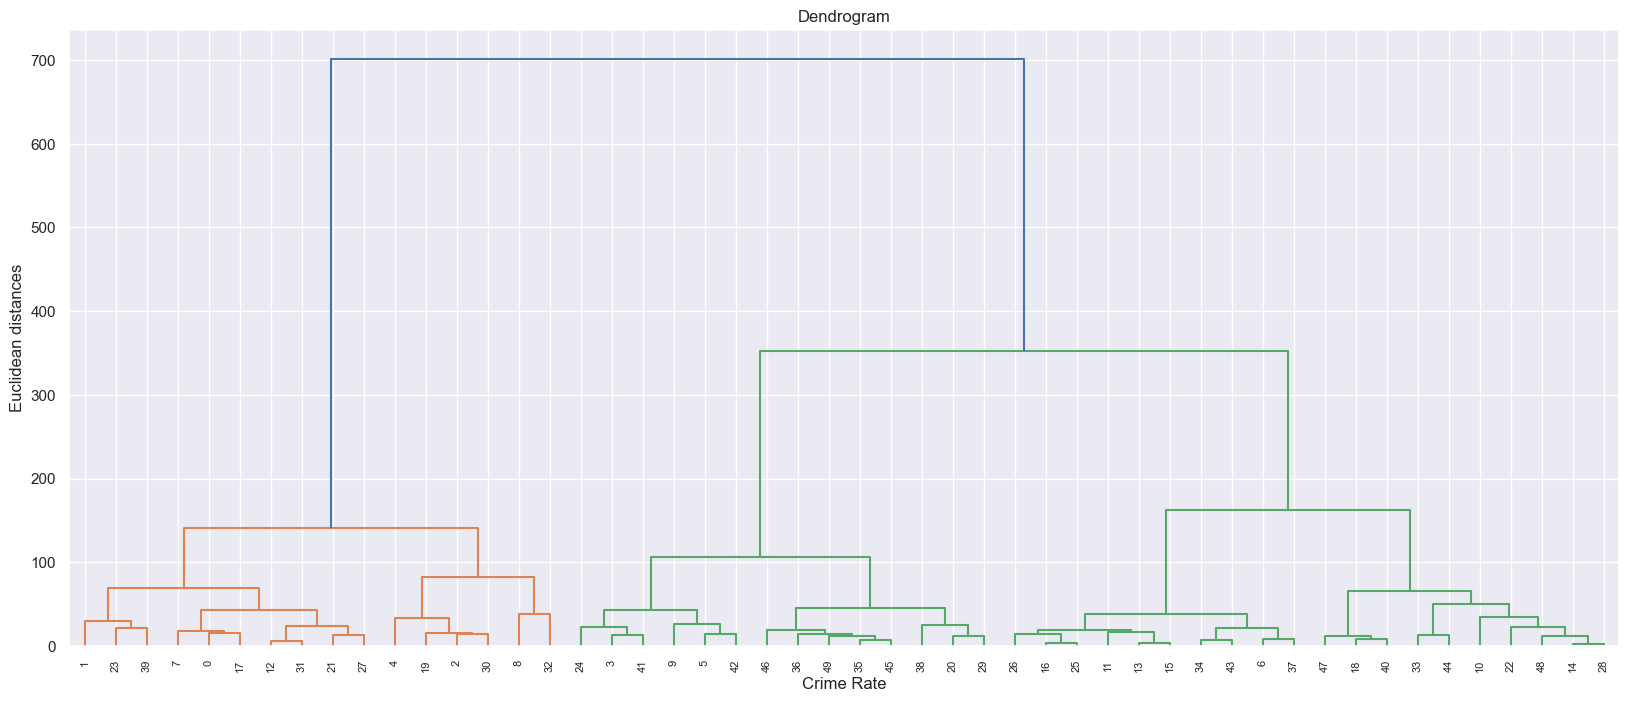

In [84]:
 # # With Ward method
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(data, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')
plt.show()

## How do we determine the optimal number of clusters from this diagram?

In [96]:
# Fit the Agglomerative Clustering
 
AC = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

TypeError: AgglomerativeClustering.__init__() got an unexpected keyword argument 'affinity'

We look for the largest distance that we can vertically without crossing any horizontal line and this one is the red framed line on the above diagram. Let’s count the number of lines on the diagram and determine the optimal number of clusters. Cluster number will be 3 for this dataset.

In [98]:
from sklearn.cluster import AgglomerativeClustering

# Corrected version of Agglomerative Clustering without affinity
AC = AgglomerativeClustering(n_clusters=3, linkage='ward')




In [100]:
# Fit and predict to have the cluster labels.
y_pred =AC.fit_predict(data)
y_pred

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2], dtype=int64)

In [102]:
# Fetch the cluster labels
crime['cluster labels']= y_pred

In [104]:
# Let's see which State falls in which cluster
crime[['State','cluster labels']]

,State,cluster labels
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,2


# Observations:

The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.

The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.

The Cities in Cluster-3 seems to have moderate crime rates when compared to other zones and can be called as Moderate-Zone

In [122]:
Safe_Zone= crime.groupby('cluster labels')['State'].unique()[0]
Safe_Zone

array(['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska',
       'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania',
       'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin'],
      dtype=object)

In [124]:
Danger_Zone= crime.groupby('cluster labels')['State'].unique()[1]
Danger_Zone

array(['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware',
       'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan',
       'Mississippi', 'Nevada', 'New Mexico', 'New York',
       'North Carolina', 'South Carolina'], dtype=object)

In [126]:
Moderate_Zone= crime.groupby('cluster labels')['State'].unique()[2]
Moderate_Zone

array(['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri',
       'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee',
       'Texas', 'Virginia', 'Washington', 'Wyoming'], dtype=object)

<Axes: xlabel='cluster labels', ylabel='Murder'>

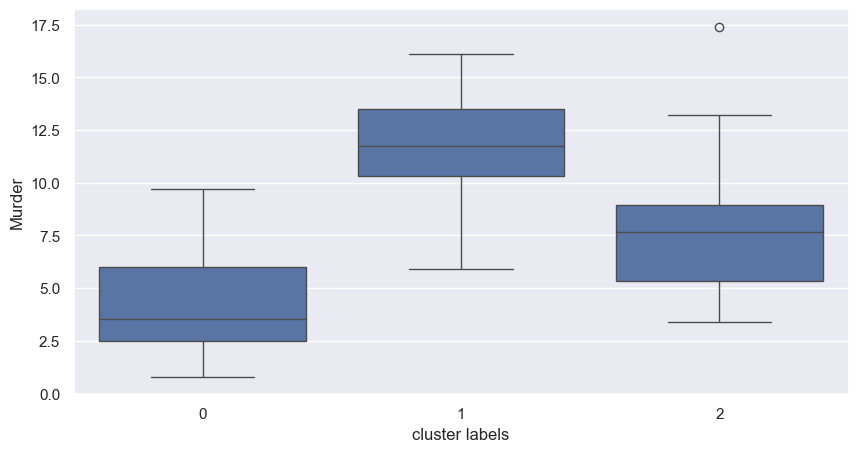

In [106]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Murder', data=crime)

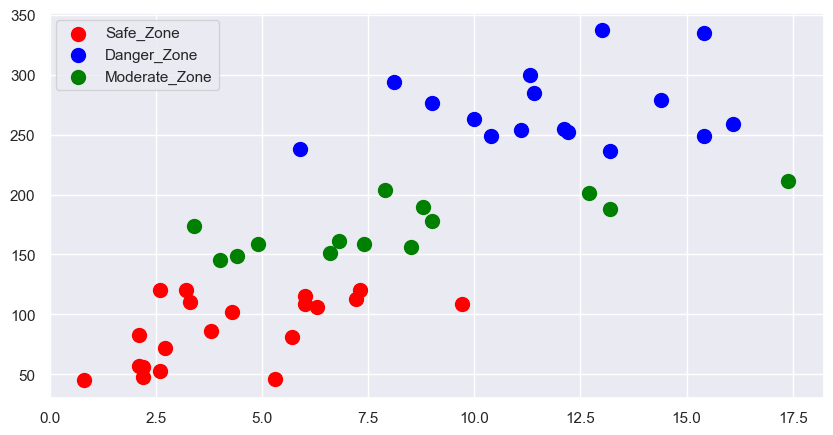

In [128]:
plt.figure(figsize=(10,5))
plt.scatter(data[y_pred==0, 0], data[y_pred==0, 1], s=100, c='red', label ='Safe_Zone')
plt.scatter(data[y_pred==1, 0], data[y_pred==1, 1], s=100, c='blue', label ='Danger_Zone')
plt.scatter(data[y_pred==2, 0], data[y_pred==2, 1], s=100, c='green', label ='Moderate_Zone')
plt.legend()
plt.show()

<Axes: xlabel='cluster labels', ylabel='Rape'>

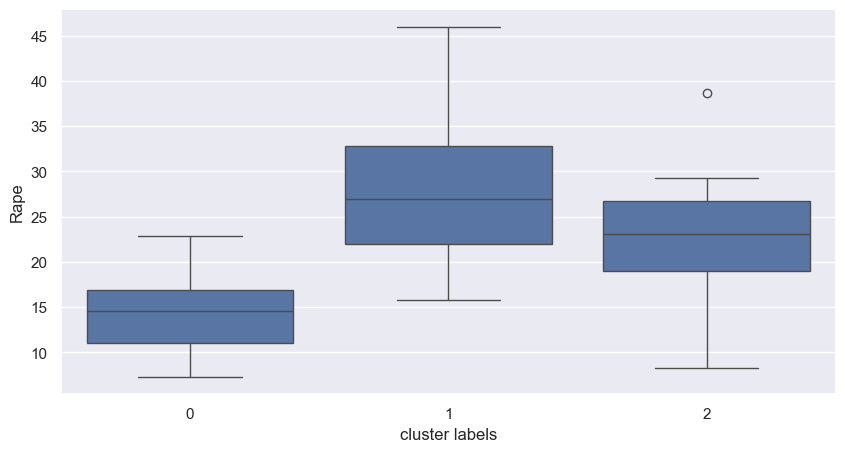

In [108]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Rape', data=crime)

<Axes: xlabel='cluster labels', ylabel='Assault'>

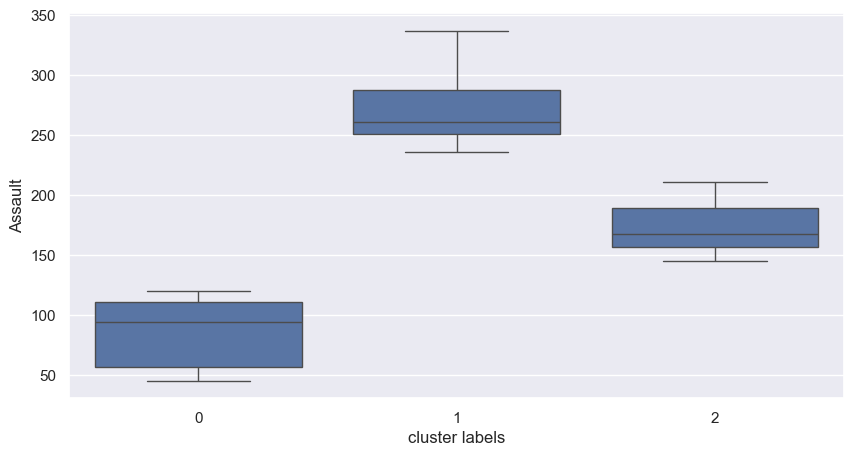

In [110]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Assault', data=crime)

In [148]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances


In [152]:
# You can also inspect which columns are numeric
df_numeric = df.select_dtypes(include=[np.number])

In [156]:
# Pairwise Euclidean distance between each pair of data points (rows)
from sklearn.metrics import pairwise_distances
euclidean_distances = pairwise_distances(df_numeric, metric='euclidean')

In [158]:
# Step 3: Calculate pairwise Euclidean distances
euclidean_distances = pairwise_distances(df_numeric, metric='euclidean')

In [160]:
# Convert the result to a DataFrame for better visualization
euclidean_df = pd.DataFrame(euclidean_distances, index=df.index, columns=df.index)
print("Pairwise Euclidean Distances:")
print(euclidean_df)

Pairwise Euclidean Distances:
            0           1           2           3           4           5   \
0     0.000000   37.177009   63.008333   46.928137   55.524769   41.932565   
1    37.177009    0.000000   46.592489   77.197409   45.102217   66.475935   
2    63.008333   46.592489    0.000000  108.851918   23.194180   90.351148   
3    46.928137   77.197409  108.851918    0.000000   97.582017   36.734861   
4    55.524769   45.102217   23.194180   97.582017    0.000000   73.197131   
5    41.932565   66.475935   90.351148   36.734861   73.197131    0.000000   
6   128.206942  159.406556  185.159526   85.028289  169.277110   98.081191   
7    16.806249   45.182961   58.616380   53.010376   49.291480   41.477825   
8   102.001618   79.974496   41.654532  148.735739   60.980735  131.405822   
9    25.841827   57.030255   86.037957   25.586129   73.997297   25.093027   
10  191.803050  221.193535  248.268967  147.775979  231.071093  159.179176   
11  116.761980  146.484982  176.81

# Pairwise correlations

In [162]:
# Transpose the DataFrame to calculate correlations between columns (features)
correlation_matrix = np.corrcoef(df_numeric.T)

In [164]:
# Step 4: Convert to a DataFrame for better readability
correlation_df = pd.DataFrame(correlation_matrix, index=df_numeric.columns, columns=df_numeric.columns)

In [167]:
# Display the correlation matrix
print("Pairwise Feature Correlations (Correlation Matrix):")
print(correlation_df)

Pairwise Feature Correlations (Correlation Matrix):
            Murder   Assault  UrbanPop      Rape
Murder    1.000000  0.801873  0.069573  0.563579
Assault   0.801873  1.000000  0.258872  0.665241
UrbanPop  0.069573  0.258872  1.000000  0.411341
Rape      0.563579  0.665241  0.411341  1.000000


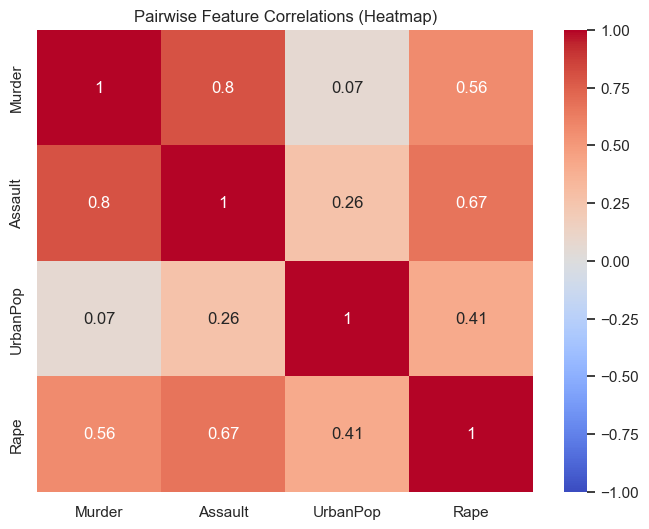

In [169]:
# Optionally: Visualize the correlation matrix using a heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Pairwise Feature Correlations (Heatmap)')
plt.show()

 ### Murder and Assault (Correlation: 0.8):

There is a strong positive correlation between Murder and Assault (0.8). This means that states with high murder rates tend to also have high assault rates.

### Murder and Rape (Correlation: 0.56):

There is a moderate positive correlation between Murder and Rape (0.56), indicating that these two crimes tend to increase together to some extent but not as strongly as Murder and Assault.